In [1]:
import os
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd

In [2]:
os.makedirs('../plots', exist_ok=True)

In [3]:
df_flat10 = pd.read_csv('../output/flat10_key-metrics_fair2.1.2_cal1.2.0.csv', index_col=0)
df_1pctCO2 = pd.read_csv('../output/1pctCO2_key-metrics_fair2.1.2_cal1.2.0.csv', index_col=0)

In [4]:
df_flat10

,tcre,zec50,zec100,zec200,tr1000,tr0,tpw
1230,1.816282,-0.153803,-0.260057,-0.381241,-0.308663,-0.578928,-9
1715,1.129808,-0.092747,-0.122589,-0.156074,-0.175325,-0.174717,-8
2658,2.431879,0.420867,0.586807,0.630372,0.785061,0.291002,19
3898,2.485880,0.616489,0.928098,1.132809,1.192432,0.670891,26
5915,1.859944,-0.092349,-0.116011,-0.125093,-0.153236,-0.192797,-4
...,...,...,...,...,...,...,...
1494559,1.955469,0.017860,0.043594,0.033851,0.054277,-0.073185,2
1495435,1.776385,-0.007122,-0.042187,-0.105636,-0.021346,-0.214746,0
1497041,1.874050,0.155500,0.186048,0.133724,0.252317,-0.097058,9
1497105,1.592953,-0.112906,-0.152864,-0.186585,-0.205102,-0.204603,-6


In [5]:
df_1pctCO2

,tcre,zec50,zec100
1230,1.908141,-0.176201,-0.307369
1715,1.204298,-0.141009,-0.179506
2658,2.193757,0.565341,0.802064
3898,2.135317,0.789266,1.202779
5915,1.943801,-0.144263,-0.183165
...,...,...,...
1494559,1.971386,0.001661,0.036484
1495435,1.774262,0.029313,-0.012182
1497041,1.788985,0.219264,0.284737
1497105,1.687556,-0.169742,-0.224546


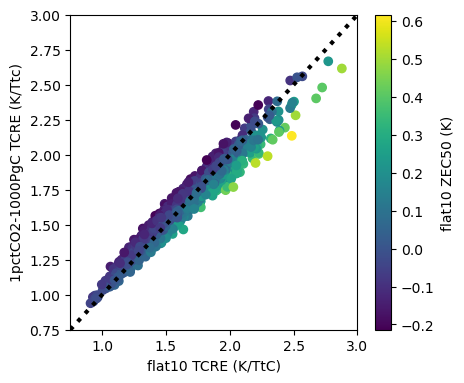

In [6]:
low=0.75
high=3
fig, ax = pl.subplots(figsize=(12/2.54, 10/2.54))
sc = ax.scatter(df_flat10["tcre"], df_1pctCO2["tcre"], c=df_flat10["zec50"])
ax.plot((low, high), (low, high), color='k', lw=3, ls=':')
ax.set_xlim(low, high)
ax.set_ylim(low, high)
ax.set_xlabel("flat10 TCRE (K/TtC)")
ax.set_ylabel("1pctCO2-1000PgC TCRE (K/Ttc)")
cb=pl.colorbar(sc)
cb.set_label('flat10 ZEC50 (K)')
fig.tight_layout()
pl.savefig('../plots/TCRE_scatter.png')

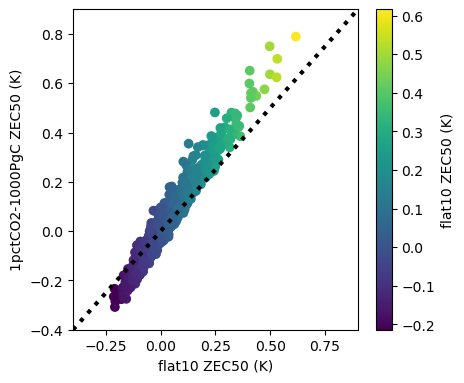

In [7]:
low=-0.4
high=0.9
fig, ax = pl.subplots(figsize=(12/2.54, 10/2.54))
sc = pl.scatter(df_flat10["zec50"], df_1pctCO2["zec50"], c=df_flat10["zec50"])
ax.plot((low, high), (low, high), color='k', lw=3, ls=':')
ax.set_xlim(low, high)
ax.set_ylim(low, high)
ax.set_xlabel("flat10 ZEC50 (K)")
ax.set_ylabel("1pctCO2-1000PgC ZEC50 (K)")
cb=pl.colorbar(sc)
cb.set_label('flat10 ZEC50 (K)')
fig.tight_layout()
pl.savefig('../plots/ZEC50_scatter.png')

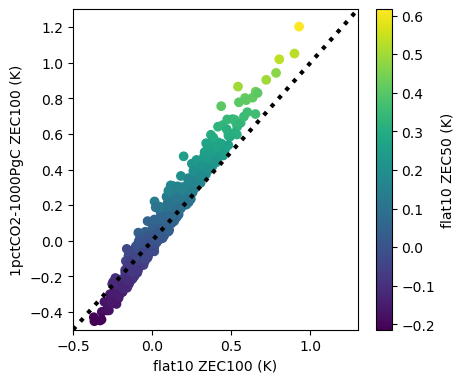

In [8]:
low=-0.5
high=1.3
fig, ax = pl.subplots(figsize=(12/2.54, 10/2.54))
sc = ax.scatter(df_flat10["zec100"], df_1pctCO2["zec100"], c=df_flat10["zec50"])
ax.plot((low, high), (low, high), color='k', lw=3, ls=':')
ax.set_xlim(low, high)
ax.set_ylim(low, high)
ax.set_xlabel("flat10 ZEC100 (K)")
ax.set_ylabel("1pctCO2-1000PgC ZEC100 (K)")
cb=pl.colorbar(sc)
cb.set_label('flat10 ZEC50 (K)')
fig.tight_layout()
pl.savefig('../plots/ZEC100_scatter.png')

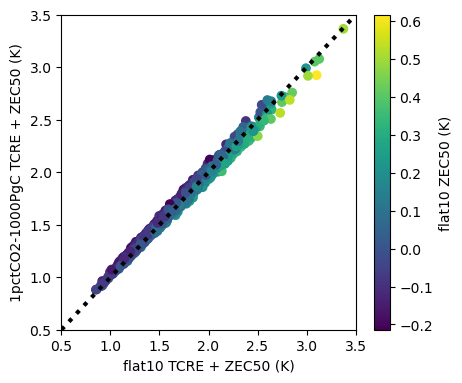

In [9]:
low=0.5
high=3.5
fig, ax = pl.subplots(figsize=(12/2.54, 10/2.54))
sc = ax.scatter(df_flat10["tcre"] + df_flat10["zec50"], df_1pctCO2["tcre"] + df_1pctCO2["zec50"], c=df_flat10["zec50"])
ax.plot((low, high), (low, high), color='k', lw=3, ls=':')
ax.set_xlim(low, high)
ax.set_ylim(low, high)
ax.set_xlabel("flat10 TCRE + ZEC50 (K)")
ax.set_ylabel("1pctCO2-1000PgC TCRE + ZEC50 (K)")
cb=pl.colorbar(sc)
cb.set_label('flat10 ZEC50 (K)')
fig.tight_layout()
pl.savefig('../plots/TCRE+ZEC50_scatter.png')

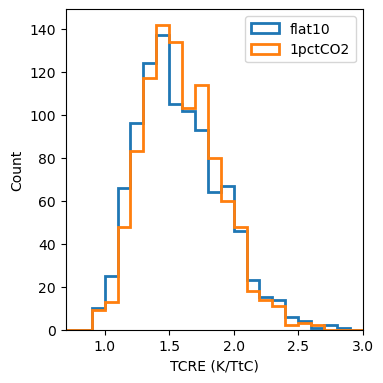

In [10]:
low=0.7
high=3
dt=0.1
fig, ax = pl.subplots(figsize=(10/2.54, 10/2.54))
ax.hist(df_flat10["tcre"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='flat10')
ax.hist(df_1pctCO2["tcre"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='1pctCO2')
ax.set_xlabel('TCRE (K/TtC)')
ax.set_ylabel('Count')
ax.set_xlim(low, high)
ax.legend();
fig.tight_layout()
pl.savefig('../plots/TCRE_hist.png')

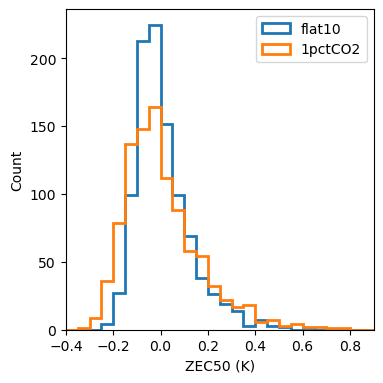

In [11]:
low=-0.4
high=0.9
dt=0.05
fig, ax = pl.subplots(figsize=(10/2.54, 10/2.54))
ax.hist(df_flat10["zec50"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='flat10')
ax.hist(df_1pctCO2["zec50"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='1pctCO2')
ax.set_xlabel('ZEC50 (K)')
ax.set_ylabel('Count')
ax.set_xlim(low, high)
ax.legend();
fig.tight_layout()
pl.savefig('../plots/ZEC50_hist.png')

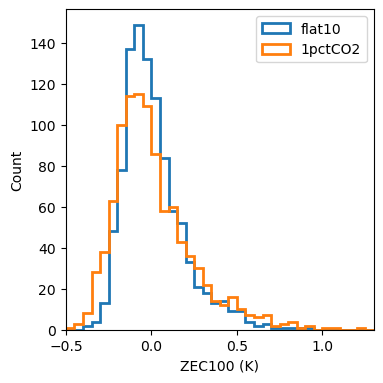

In [12]:
low=-0.5
high=1.3
dt=0.05
fig, ax = pl.subplots(figsize=(10/2.54, 10/2.54))
ax.hist(df_flat10["zec100"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='flat10')
ax.hist(df_1pctCO2["zec100"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='1pctCO2')
ax.set_xlabel('ZEC100 (K)')
ax.set_ylabel('Count')
ax.set_xlim(low, high)
ax.legend();
fig.tight_layout()
pl.savefig('../plots/ZEC100_hist.png')

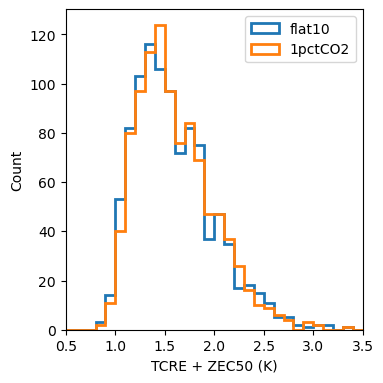

In [13]:
low=0.5
high=3.5
dt=0.1
fig, ax = pl.subplots(figsize=(10/2.54, 10/2.54))
ax.hist(df_flat10["tcre"] + df_flat10["zec50"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='flat10')
ax.hist(df_1pctCO2["tcre"] + df_1pctCO2["zec50"], histtype='step', lw=2, bins = np.arange(low, high+dt, dt), label='1pctCO2')
ax.set_xlabel('TCRE + ZEC50 (K)')
ax.set_ylabel('Count')
ax.set_xlim(low, high)
ax.legend();
fig.tight_layout()
pl.savefig('../plots/TCRE+ZEC50_hist.png')